In [1]:
from torch_geometric.datasets import Planetoid, ZINC, QM9

In [2]:
from torch_geometric.transforms import NormalizeFeatures

In [34]:
dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())   ## This should be fine! 

In [35]:
dataset.__dict__

{'name': 'Cora',
 'root': 'data/Planetoid',
 'transform': NormalizeFeatures(),
 'pre_transform': None,
 'pre_filter': None,
 '_indices': None,
 'data': Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708]),
 'slices': None,
 '_data_list': None,
 'split': 'public'}

In [155]:
dataset.data.y.unique(return_counts=True)

(tensor([0, 1, 2, 3, 4, 5, 6]), tensor([351, 217, 418, 818, 426, 298, 180]))

In [36]:
dataset.data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [37]:
dataset.data.x[0].nonzero()

tensor([[  19],
        [  81],
        [ 146],
        [ 315],
        [ 774],
        [ 877],
        [1194],
        [1247],
        [1274]])

In [38]:
idx = 0
dataset.data.x[0][[19, 81, 146]]


tensor([1., 1., 1.])

## Lets look at the ZINC and QM9 dataset

### Now a problem with these datasets is that they are not created for predicting node-level properties, which is required if we are somehow to compare the results with a MLP

In [3]:
zinc_train_dataset = ZINC(root='data/ZINC', split="train", subset=True, transform=NormalizeFeatures()) 
zinc_val_dataset = ZINC(root='data/ZINC', split="val", subset=True, transform=NormalizeFeatures())
zinc_test_dataset = ZINC(root='data/ZINC', split="test", subset=True, transform=NormalizeFeatures())
QM9_train_dataset = QM9(root='data/QM9', transform=NormalizeFeatures()) 


In [94]:
zinc_val_dataset.data.x.unique(return_counts=True)   # This is a categorical variable --> We are feeding in "graphs" instead of nodes 

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 tensor([16163,  2230,  2498,   302,   866,   392,   160,    99,   150,    63,
            33,    66,    49,     6,     2,     4]))

In [70]:
from torch_geometric.loader import DataLoader

In [71]:
zinc_val_loader = DataLoader(zinc_val_dataset)

In [74]:
zinc_val_loader.__dict__

{'follow_batch': None,
 'exclude_keys': None,
 'dataset': ZINC(1000),
 'num_workers': 0,
 'prefetch_factor': 2,
 'pin_memory': False,
 'timeout': 0,
 'worker_init_fn': None,
 '_DataLoader__multiprocessing_context': None,
 '_dataset_kind': 0,
 'batch_size': 1,
 'drop_last': False,
 'sampler': <torch.utils.data.sampler.SequentialSampler at 0x7fd5e0e15f40>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x7fd5e0e154f0>,
 'generator': None,
 'collate_fn': <torch_geometric.loader.dataloader.Collater at 0x7fd5e0e15b80>,
 'persistent_workers': False,
 '_DataLoader__initialized': True,
 '_IterableDataset_len_called': None,
 '_iterator': None}

In [87]:
loader = DataLoader(ZINC(root='data/ZINC', split="val", subset=True))
for data in loader:
    #print(data.__dict__)
    print(data.x.shape, data.y.shape, data.edge_index.shape)   # each batch is a molecule or something -> this is not node prediction...
    raise
    #print(data.y)

torch.Size([35, 1]) torch.Size([1]) torch.Size([2, 78])


RuntimeError: No active exception to reraise

In [75]:
zinc_val_loader[0]


TypeError: 'DataLoader' object is not subscriptable

In [59]:
zinc_val_dataset.__dict__

{'subset': True,
 'root': 'data/ZINC',
 'transform': NormalizeFeatures(),
 'pre_transform': None,
 'pre_filter': None,
 '_indices': None,
 'data': Data(x=[23083, 1], edge_index=[2, 49692], edge_attr=[49692], y=[1000]),
 'slices': defaultdict(dict,
             {'x': tensor([    0,    35,    54,  ..., 23045, 23056, 23083]),
              'edge_index': tensor([    0,    78,   118,  ..., 49610, 49630, 49692]),
              'edge_attr': tensor([    0,    78,   118,  ..., 49610, 49630, 49692]),
              'y': tensor([   0,    1,    2,  ...,  998,  999, 1000])}),
 '_data_list': None}

In [65]:
zinc_train_dataset.data

Data(x=[231664, 1], edge_index=[2, 498558], edge_attr=[498558], y=[10000])

In [69]:
zinc_train_dataset.data.

tensor([0])

In [67]:
zinc_train_dataset.data.y.shape

torch.Size([10000])

In [60]:
zinc_val_dataset.data.edge_index

tensor([[ 0,  1,  1,  ..., 25, 25, 26],
        [ 1,  0,  2,  ..., 24, 26, 25]])

In [58]:
QM9_train_dataset.__dict__

{'root': 'data/QM9',
 'transform': NormalizeFeatures(),
 'pre_transform': None,
 'pre_filter': None,
 '_indices': None,
 'data': Data(x=[2359210, 11], edge_index=[2, 4883516], edge_attr=[4883516, 4], y=[130831, 19], pos=[2359210, 3], idx=[130831], name=[130831], z=[2359210]),
 'slices': defaultdict(dict,
             {'x': tensor([      0,       5,       9,  ..., 2359176, 2359194, 2359210]),
              'edge_index': tensor([      0,       8,      14,  ..., 4883432, 4883476, 4883516]),
              'edge_attr': tensor([      0,       8,      14,  ..., 4883432, 4883476, 4883516]),
              'y': tensor([     0,      1,      2,  ..., 130829, 130830, 130831]),
              'pos': tensor([      0,       5,       9,  ..., 2359176, 2359194, 2359210]),
              'idx': tensor([     0,      1,      2,  ..., 130829, 130830, 130831]),
              'name': tensor([     0,      1,      2,  ..., 130829, 130830, 130831]),
              'z': tensor([      0,       5,       9,  ..., 23591

In [63]:
QM9_train_dataset.data


Data(x=[2359210, 11], edge_index=[2, 4883516], edge_attr=[4883516, 4], y=[130831, 19], pos=[2359210, 3], idx=[130831], name=[130831], z=[2359210])

In [50]:
ZINC.__dict__

mappingproxy({'__module__': 'torch_geometric.datasets.zinc',
              '__doc__': 'The ZINC dataset from the `ZINC database\n    <https://pubs.acs.org/doi/abs/10.1021/acs.jcim.5b00559>`_ and the\n    `"Automatic Chemical Design Using a Data-Driven Continuous Representation\n    of Molecules" <https://arxiv.org/abs/1610.02415>`_ paper, containing about\n    250,000 molecular graphs with up to 38 heavy atoms.\n    The task is to regress a synthetic computed property dubbed as the\n    constrained solubility.\n\n    Args:\n        root (string): Root directory where the dataset should be saved.\n        subset (boolean, optional): If set to :obj:`True`, will only load a\n            subset of the dataset (12,000 molecular graphs), following the\n            `"Benchmarking Graph Neural Networks"\n            <https://arxiv.org/abs/2003.00982>`_ paper. (default: :obj:`False`)\n        split (string, optional): If :obj:`"train"`, loads the training\n            dataset.\n            If :

In [52]:
print(zinc_train_dataset)

ZINC(10000)


In [53]:
zinc_train_dataset.__dict__

{'subset': True,
 'root': 'data/ZINC',
 'transform': NormalizeFeatures(),
 'pre_transform': None,
 'pre_filter': None,
 '_indices': None,
 'data': Data(x=[231664, 1], edge_index=[2, 498558], edge_attr=[498558], y=[10000]),
 'slices': defaultdict(dict,
             {'x': tensor([     0,     29,     55,  ..., 231631, 231646, 231664]),
              'edge_index': tensor([     0,     64,    120,  ..., 498490, 498520, 498558]),
              'edge_attr': tensor([     0,     64,    120,  ..., 498490, 498520, 498558]),
              'y': tensor([    0,     1,     2,  ...,  9998,  9999, 10000])}),
 '_data_list': None}

In [54]:
zinc_train_dataset.data.edge_attr.unique(return_counts=True)

(tensor([1, 2, 3]), tensor([370120, 127096,   1342]))

In [55]:
zinc_val_dataset.data.edge_attr.unique(return_counts=True)

(tensor([1, 2, 3]), tensor([37088, 12496,   108]))

In [45]:
QM9_dataset.__dict__

{'root': 'data/QM9',
 'transform': NormalizeFeatures(),
 'pre_transform': None,
 'pre_filter': None,
 '_indices': None,
 'data': Data(x=[2359210, 11], edge_index=[2, 4883516], edge_attr=[4883516, 4], y=[130831, 19], pos=[2359210, 3], idx=[130831], name=[130831], z=[2359210]),
 'slices': defaultdict(dict,
             {'x': tensor([      0,       5,       9,  ..., 2359176, 2359194, 2359210]),
              'edge_index': tensor([      0,       8,      14,  ..., 4883432, 4883476, 4883516]),
              'edge_attr': tensor([      0,       8,      14,  ..., 4883432, 4883476, 4883516]),
              'y': tensor([     0,      1,      2,  ..., 130829, 130830, 130831]),
              'pos': tensor([      0,       5,       9,  ..., 2359176, 2359194, 2359210]),
              'idx': tensor([     0,      1,      2,  ..., 130829, 130830, 130831]),
              'name': tensor([     0,      1,      2,  ..., 130829, 130830, 130831]),
              'z': tensor([      0,       5,       9,  ..., 23591

In [46]:
dataset.__dict__

{'name': 'Cora',
 'root': 'data/Planetoid',
 'transform': NormalizeFeatures(),
 'pre_transform': None,
 'pre_filter': None,
 '_indices': None,
 'data': Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708]),
 'slices': None,
 '_data_list': None,
 'split': 'public'}

## Here's the OpenGraphBenchmark - Arxiv citation dataset and ogbn-proteins!

In [4]:
from ogb.nodeproppred import PygNodePropPredDataset
arxiv_dataset = PygNodePropPredDataset(name = "ogbn-arxiv", root = 'data/arxiv')
products_dataset = PygNodePropPredDataset(name = "ogbn-products", root = 'data/products')

In [8]:
qq = arxiv_dataset.get_idx_split()["train"]
print(type(qq), qq.shape, qq)


<class 'torch.Tensor'> torch.Size([90941]) tensor([     0,      1,      2,  ..., 169145, 169148, 169251])


In [106]:
arxiv_dataset.get_idx_split()

{'train': tensor([     0,      1,      2,  ..., 169145, 169148, 169251]),
 'valid': tensor([   349,    357,    366,  ..., 169185, 169261, 169296]),
 'test': tensor([   346,    398,    451,  ..., 169340, 169341, 169342])}

In [89]:
arxiv_dataset.__dict__

{'name': 'ogbn-arxiv',
 'dir_name': 'ogbn_arxiv',
 'original_root': 'data/arxiv',
 'root': 'data/arxiv/ogbn_arxiv',
 'meta_info': num tasks                                                                1
 num classes                                                             40
 eval metric                                                            acc
 task type                                        multiclass classification
 download_name                                                        arxiv
 version                                                                  1
 url                      http://snap.stanford.edu/ogb/data/nodeproppred...
 add_inverse_edge                                                     False
 has_node_attr                                                         True
 has_edge_attr                                                        False
 split                                                                 time
 additional node files             

In [97]:
#arxiv_dataset.data.y.unique(return_counts=True)
arxiv_dataset.data.x.shape


torch.Size([169343, 128])

In [132]:
products_dataset.data.x.min()

tensor(-1434.0566)

In [133]:
import seaborn as sns

In [138]:
arxiv_dataset.data.x.shape

torch.Size([169343, 128])

In [147]:
import numpy as np
arxiv_dataset.data.x[::100].contiguous().view(-1, 1).numpy()

array([[-0.057943],
       [-0.05253 ],
       [-0.072603],
       ...,
       [-0.009134],
       [-0.026237],
       [-0.195975]], dtype=float32)

<AxesSubplot:ylabel='Count'>

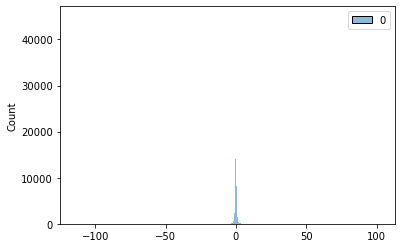

In [151]:
sns.histplot(products_dataset.data.x[::100].contiguous().view(-1, 1).numpy())

<AxesSubplot:ylabel='Count'>

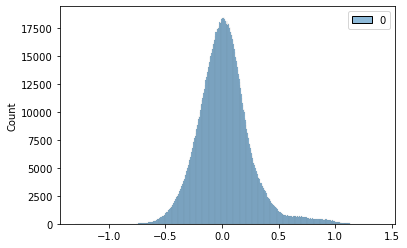

In [153]:
sns.histplot(arxiv_dataset.data.x[::10].contiguous().view(-1, 1).numpy())

In [117]:
arxiv_dataset.__num_classes__

40

In [157]:
products_dataset.__num_classes__

47

In [163]:
dataset.data.y.shape

torch.Size([2708])

In [164]:
arxiv_dataset.data.y.squeeze().shape


torch.Size([169343])

In [162]:
arxiv_dataset.data.y.shape

torch.Size([169343, 1])

In [165]:
arxiv_dataset.get_idx_split()

{'train': tensor([     0,      1,      2,  ..., 169145, 169148, 169251]),
 'valid': tensor([   349,    357,    366,  ..., 169185, 169261, 169296]),
 'test': tensor([   346,    398,    451,  ..., 169340, 169341, 169342])}

In [166]:
products_dataset.get_idx_split()

{'train': tensor([     0,      1,      2,  ..., 196612, 196613, 196614]),
 'valid': tensor([196615, 196616, 196617,  ..., 235935, 235936, 235937]),
 'test': tensor([ 235938,  235939,  235940,  ..., 2449026, 2449027, 2449028])}

In [159]:
products_dataset.data

Data(edge_index=[2, 123718280], x=[2449029, 100], y=[2449029, 1])

In [116]:
arxiv_dataset[0]

Data(edge_index=[2, 1166243], x=[169343, 128], node_year=[169343, 1], y=[169343, 1])

In [158]:
dataset.data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [122]:
from models import GCN
res = GCN(hidden_channels=200, num_classes=40, num_features=128)(x=arxiv_dataset.data.x, edge_index=arxiv_dataset.data.edge_index)

KeyboardInterrupt: 

In [125]:
dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
dataset.__dict__

{'name': 'Cora',
 'root': 'data/Planetoid',
 'transform': NormalizeFeatures(),
 'pre_transform': None,
 'pre_filter': None,
 '_indices': None,
 'data': Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708]),
 'slices': None,
 '_data_list': None,
 'split': 'public'}

In [119]:
res.shape

torch.Size([169343, 40])

In [156]:
arxiv_dataset.get_idx_split()

{'train': tensor([     0,      1,      2,  ..., 169145, 169148, 169251]),
 'valid': tensor([   349,    357,    366,  ..., 169185, 169261, 169296]),
 'test': tensor([   346,    398,    451,  ..., 169340, 169341, 169342])}

In [121]:
index_split = arxiv_dataset.get_idx_split()
print([f"{key}:, {len(value)}" for key, value in index_split.items()])

['train:, 90941', 'valid:, 29799', 'test:, 48603']


In [98]:
products_dataset.__dict__

{'name': 'ogbn-products',
 'dir_name': 'ogbn_products',
 'original_root': 'data/products',
 'root': 'data/products/ogbn_products',
 'meta_info': num tasks                                                                1
 num classes                                                             47
 eval metric                                                            acc
 task type                                        multiclass classification
 download_name                                                     products
 version                                                                  1
 url                      http://snap.stanford.edu/ogb/data/nodeproppred...
 add_inverse_edge                                                      True
 has_node_attr                                                         True
 has_edge_attr                                                        False
 split                                                        sales_ranking
 additional node fil

In [101]:
products_split_idx = products_dataset.get_idx_split()
print([f"{key}:, {len(value)}" for key, value in products_split_idx.items()])

['train, 196615', 'valid, 39323', 'test, 2213091']


In [107]:
arxiv_split_idx = arxiv_dataset.get_idx_split()
print([f"{key}:, {len(value)}" for key, value in arxiv_split_idx.items()])

['train:, 90941', 'valid:, 29799', 'test:, 48603']


In [42]:
arxiv_dataset.get_idx_split()
print([f"{key}, {len(a)}" for key, a in arxiv_dataset.get_idx_split().items()])

['train, 90941', 'valid, 29799', 'test, 48603']


In [108]:
from torch_geometric.data import DataLoader

In [111]:
arxiv_dataset.data

Data(edge_index=[2, 1166243], x=[169343, 128], node_year=[169343, 1], y=[169343, 1])

In [115]:
tmp = arxiv_dataset[:100]
tmp.__dict__
#len(tmp)

{'name': 'ogbn-arxiv',
 'dir_name': 'ogbn_arxiv',
 'original_root': 'data/arxiv',
 'root': 'data/arxiv/ogbn_arxiv',
 'meta_info': num tasks                                                                1
 num classes                                                             40
 eval metric                                                            acc
 task type                                        multiclass classification
 download_name                                                        arxiv
 version                                                                  1
 url                      http://snap.stanford.edu/ogb/data/nodeproppred...
 add_inverse_edge                                                     False
 has_node_attr                                                         True
 has_edge_attr                                                        False
 split                                                                 time
 additional node files             

In [110]:
split_idx = arxiv_dataset.get_idx_split() 
train_loader = DataLoader(arxiv_dataset[split_idx["train"]], batch_size=32, shuffle=True)

IndexError: range object index out of range

In [109]:
train_loader = DataLoader([arxiv_dataset.get_idx_split()["train"]])

IndexError: range object index out of range

In [1]:
import numpy as np

In [2]:
X, y = np.load("comparison/tishby_X.npy"), np.load("comparison/tishby_y.npy")

In [3]:
X.shape, y.shape

((4096, 12), (4096, 1))

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [1, 1, 1, ..., 1, 0, 1],
        [1, 1, 1, ..., 1, 1, 0],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 array([], shape=(0, 12), dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [1, 1, 1, ..., 1, 0, 1],
        [1, 1, 1, ..., 1, 1, 0],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)]

## Tishby Dataset

In [12]:
import numpy as np
import torch

In [13]:
arxiv_dataset = PygNodePropPredDataset(name = "ogbn-arxiv", root = 'data/arxiv')
arxiv_dataset.get_idx_split()["train"].dtype

torch.int64

In [15]:
X, y = np.load("comparison/tishby_X.npy"), np.load("comparison/tishby_y.npy")
N = X.shape[0]
num_val = N // 10
Train_idx = torch.tensor([i for i in range(N)]).type_as(arxiv_dataset.get_idx_split()["train"])
Val_idx= torch.tensor([i for i in range(N - num_val, N)]).type_as(arxiv_dataset.get_idx_split()["train"])
print(N, num_val)
print(Train_idx)
print(Val_idx)
print(X.shape, y.shape)

4096 409
tensor([   0,    1,    2,  ..., 4093, 4094, 4095])
tensor([3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 3696, 3697, 3698,
        3699, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3710,
        3711, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722,
        3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734,
        3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746,
        3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758,
        3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770,
        3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782,
        3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794,
        3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806,
        3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818,
        3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827

In [ ]:
4096 - 

In [17]:
values =np.array([0.1] * 17 + [0.] * 3 + [0.05] * 1 + [0.2] * 17 + [0.25] * 2 + [0.3] * 24 + [0.35] * 1 + [0.4] * 4 + [0.6] * 2)
print(f"antall verdier: {len(values)}, median: {np.median(values)}, gj.snitt: {np.sum(values) / len(values)} ")
print(f"antall verdier under (eller lik) 20%: {len([i for i in values if i <= 0.2])}")

antall verdier: 71, median: 0.2, gj.snitt: 0.2253521126760564 
antall verdier under (eller lik) 20%: 38


In [19]:
np.sort(values)

array([0.  , 0.  , 0.  , 0.05, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.2 ,
       0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
       0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.25, 0.25, 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.35, 0.4 ,
       0.4 , 0.4 , 0.4 , 0.6 , 0.6 ])

In [20]:
np.sort(values)[30:40]

array([0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.25, 0.25])